# Dimensionality Reduction Techniques on Python - 2

# Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis is a method that can be used either for classification or dimensionality reduction. The method focuses on maximizing the separability among known classes in our data. It does so by creating a new axis and projecting data onto this new axis in a way that the separation of the classes is maximized.


As it is generally the way followed when introducing LDA, I will first explain the case when we have two classes and then generalize to K > 2 classes case.


Let's say that we want to reduce the dimension of the data in (1). In LDA, we will try to maximize the separation between two groups  One naive criterion that we can use for this purpose is measuring the distance between two means $\left|\mu _1-\mu _2\right|$. However, it turns out that maximizing only the distance between two means ($m_1$ and $m_2$ ) results in the situation illustrated in picture 2. In addition to using the mean as a criterion, we can also minimize the variance in classes, by doing so, we can end up in image 3 which gives us the optimal projection. In LDA lingo, variance is called scatter and represented by $S^2$. Ideally, the projected classes should have both faraway means and small variances.

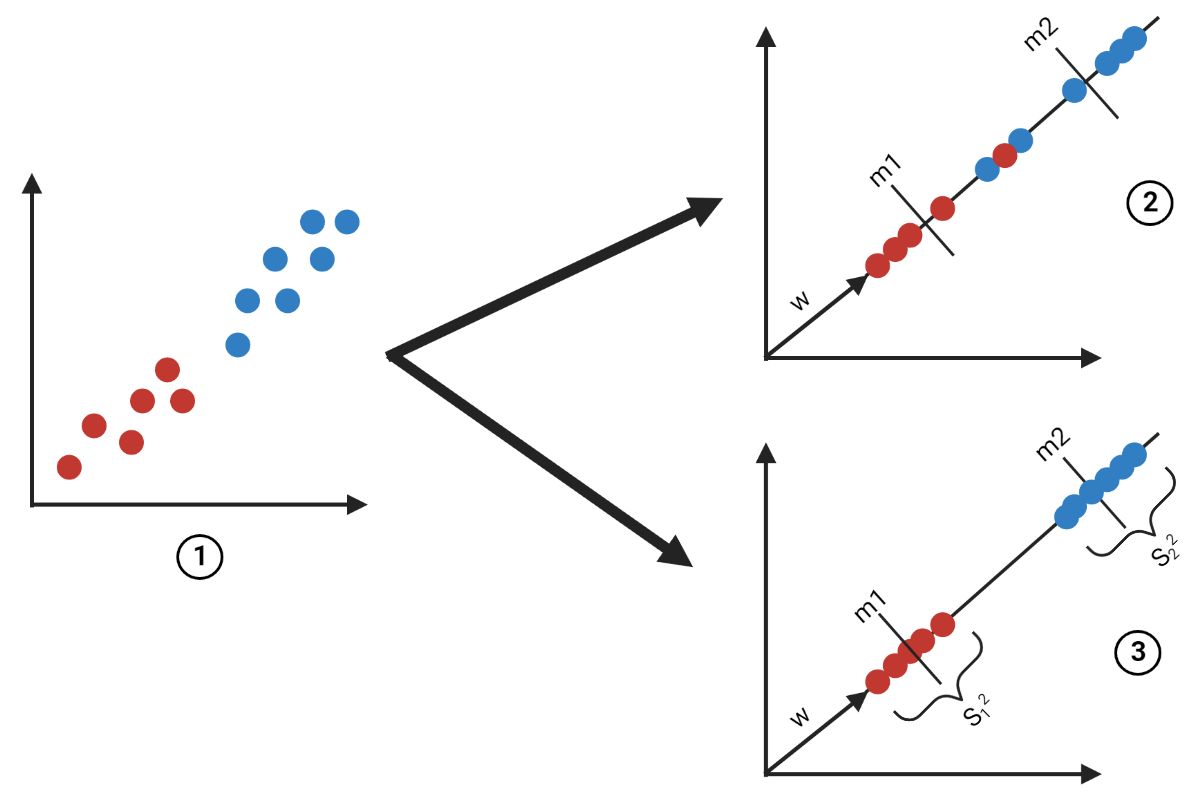

### Mathematical Details Behind LDA

Let's get on by defining the mean and scatter.

The projection of $x$ onto $w$ can be calculated by the following:

$$z=w^Tx$$

For the classes $C_r\:$ and $C_b$, the means ($M_1$ and $M_2$) are defined as the following:

$$M_1=w^Tm_1 \:\: and\:\: M_2=w^Tm_2$$

Here $m_1$ and $m_2$ are the means of samples before projection and $M_1$ and $M_2$ the means after the projection. Equally important, the sample we have is 

$$X=\left\{x^t,r^t\right\}\:such\:that\:r^t=1\:if\:x^t\:\in C_r\:and\:r^t=0\:if\:x^t\:\in \:C_b$$

The scatter of samples from $C_r\:$ and $C_b$ after projection are given:

$$S_1^2=\sum _t\left(w^Tx^t-M_{_1}\right)^2r^t \:\: and  \:\: S_2^2=\sum _t\left(w^Tx^t-M_{_2}\right)^2\left(1-r^t\right)$$

We defined the necessary elements for constructing the algorithm. Let's go through the algorithm step by step.



**1. We want $\left|M_1-M_2\right|$ to be as large as possible and $S_1^2+S_2^2$ to be as small as possible. We can achieve this by using Fisher's Linear Discriminant.**

$$J\left(w\right)=\frac{\left(M_1-M_2\right)^2}{S_1^2+S_2^2}$$

**2. We need to find w that maximizes the equation above so that we can also maximize the seperation.**

Let's rewrite the Fisher's Linear Discriminant in terms of w. I will start with the numerator:

$$\left(M_1-M_2\right)^2=\left(w^Tm_1-w^Tm_2\right)^2=w^TS_bW$$

$S_b$ is the between-class scatter matrix and it is defined as 

$$\:S_b\:=\:\left(M_1-M_2\right)\left(M_1-M_2\right)^T$$

The denominator is the sum of the scatter of instances of classes around their means and it is defined as:

$$S_1^2=w^TS_1w\:$$

where 

$$S_1=\sum _tr^t\left(x^t-M_1\right)\left(x^t-M_1\right)^T$$

is the within-class scatter matrix for $C_r$. Similarly, we can also define

$$S_2^2=w^TS_2w$$ where $$\:\:S_2=\sum _tr^t\left(x^t-M_2\right)\left(x^t-M_2\right)^T$$

Let's also define total within-class scatter:

$$\:\:S_1^2+\:\:S_2^2=w^TS_{_w}w\:\:\:where\:\:S_w=S_1+S_2$$

$S_w$ is called total within-class scatter. 


**3. Let's get back to Fisher's Discriminant and rewrite the equation**

$$J\left(w\right)=\frac{\left(M_1-M_2\right)^2}{S_1^2+S_2^2}=\frac{\left|w^T\left(M_1-M_2\right)\right|^2}{w^TS_ww}$$

To find $w$ that maximizes the equation above, we can take its derivate with respect to $w$ and set it to zero, doing so, we can get the following result:

$$w=cS^{-1}_w\left(M_1-M_2\right)\:\:where\:\:c\:is\:some\:constant.$$

Since we are interested in the direction but not the magnitude we can take c= 1 and find $w$ that maximizes the Fisher's linear discriminant.

What about the case where we have more than 2 classes? To generalize multiclass case, we need to redefine some of the equations above.

**4. Again, we need to calculate the matrix w such that**


$$z=w^Tx$$

where z is k-dimensional and W is d x k dimension. In this case within-class scatter matrix for $C_i$ is defined as

$$S_i=\sum _tr_i^t\left(x^t-M_i\right)\left(x^t-M_i\right)^T r_i^t=1\:if\:x^t\:\in C_i\:and\:\: 0 \:\:otherwise$$

and the total within-class scatter is

$$S_w=\sum _{i=1}^K\left(S_i\right)$$

The scatter of the means is calculated as how much they are spread around the overall mean

$$m_i=\frac{1}{N_i}\sum _t\left(x^tr_i^t\right)\:\:and\:\:m=\frac{1}{N}\sum_tx^t=\frac{1}{N}\sum _{i=1}^K\left(N_im_i\right)$$

and the between-class matrix is

$$S_b=\sum _{i=1}^KN_i\left(m_i-m\right)\left(m_i-m\right)^T\:with\:N_i=\sum_tr_i^t$$

**5. After projection, We have the between-class matrix $w^TS_bw$ and the within-class scatter matrix $w^TS_ww$. Our object is to maximize the first scatter after projection and we want class means to be as far apart from each other as possible. On the other hand, we want the second to scatter to be small after projection and samples from this class to be as close to their mean as possible and again we want to find $w$ that maximizes the following:**


$$J\left(w\right)=\frac{\left|w^TS_bw\right|}{|w^TS_ww|}$$

The largest eigenvectors of $S^{-1}_wS_b$ are the solution.


**Notes:**

1. Fisher's Linear Discriminant works optimal if the classes are normally distributed, however, we can also use it when the classes are not normal.

2. Note that the way we derived LDA is based on Fisher's Discriminant Analysis. We can also construct all the algorithms in a parallel way by using Bayes theorem/gaussian densities etc... You can find more about this other way of constructing the algorithm on this video [Introduction to Machine Learning - 06 - Linear discriminant analysis](https://www.youtube.com/watch?v=C0u_v7vEDBY)


**Additional Sources:**

1. [A Brief Introduction to Linear Discriminant Analysis](https://www.analyticsvidhya.com/blog/2021/08/a-brief-introduction-to-linear-discriminant-analysis/)
2. [Understanding the mathematics behind Linear Discriminant Analysis (LDA)](https://shuzhanfan.github.io/2018/07/understanding-mathematics-behind-lda/)
3. [Linear Discriminant Analysis (LDA)](https://www.sjsu.edu/faculty/guangliang.chen/Math253S20/lec11lda.pdf)
4. [Linear Discriminant Analysis, Explained](https://towardsdatascience.com/linear-discriminant-analysis-explained-f88be6c1e00b)

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
sns.set_theme(style="whitegrid")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

Using LDA for dimensionality reduction is very similar using PCA. Let's quickly explore how to use the algorithm.

In [2]:
lda=LinearDiscriminantAnalysis(n_components=2)

I will use two components and compare the result with PCA with two components. An important thing to notice is that LDA is a supervised dimensionality reduction technique (that is the most important difference between LDA and PCA).

In [3]:
X_reduced = lda.fit(X,y).transform(X)

In [4]:
1-lda.explained_variance_ratio_.sum()

0.55935066218042

It looks like LDA does a better job for explaining the variance with two components compared to PCA for this data. Let's also plot the reduced data.

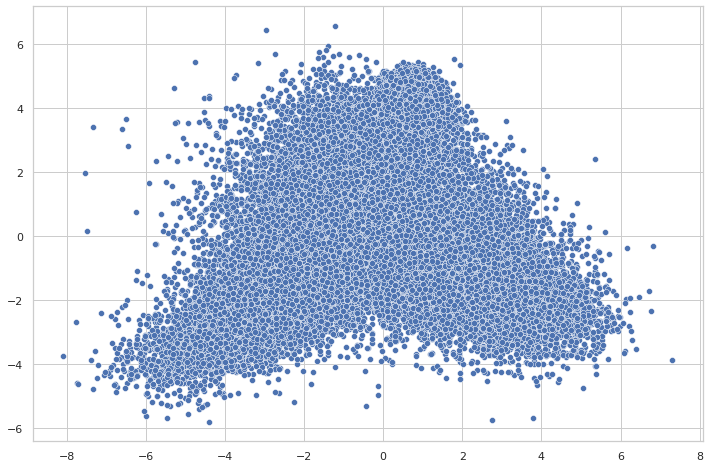

In [5]:
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1],)

We cannot pass the variance we want to preserve to `n_components` arguments unlike PCA. However, we can still plot the elbow curve and find the number of components that will yield the variance we want to preserve.

In [6]:
lda = LinearDiscriminantAnalysis()
lda.fit(X,y).transform(X)
cumsum = np.cumsum(lda.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) 

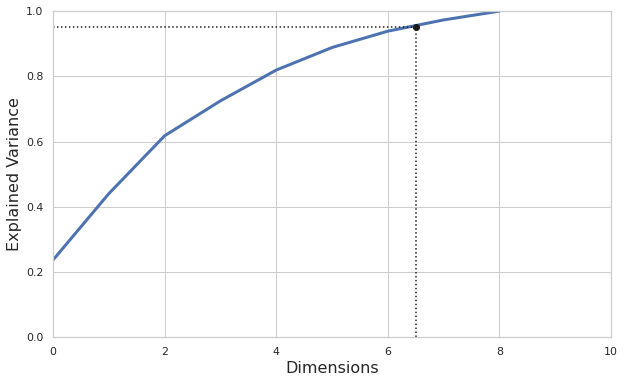

In [7]:
plt.figure(figsize=(10,6))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 10, 0, 1])
plt.xlabel("Dimensions",fontsize=16)
plt.ylabel("Explained Variance",fontsize=16)
plt.plot([d-0.5, d-0.5], [0, 0.95], "k:")
plt.plot([0, d-0.5], [0.95, 0.95], "k:")
plt.plot(d-0.5, 0.95, "ko")
plt.grid(True)
plt.show()

Another important difference is that LDA provides us some different optimizer alternatives. Check out the different `solver` options as well as other parameters that you can use: [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

# Multidimensional Scaling (MDS)

Multidimensional scaling is a technique that projects the points into a lower dimensional space such that the Euclidean distance between the points is as close as possible to given instances in the original/unknown space.

More formally, assume that we have a high dimensional space $x_1,x_2,.....,x_n\:\in \:R^t$ with some kind of distance $d_{ij}=\left||x_i-x_j\right||$. We aim to find a lower dimensional representation, $y_1,y_2,.....,y_n\:\in \:R^k$ for some $t<k$ which can approximately preserve the given distance between the points.

Multidimensional  Scaling has some variants:


### 1. Classical MDS

Classical MDS assumes that the given distance matrix is euclidean and performs a linear transformation. If the the given distance matrix is euclidean, the mapping will be exact.

**1. We start off by defining our distance matrix D.**

$$d^2_{ij}=\left|\left|x_i-x_j\right|\right|^2=⟨x_i,x_i⟩+\:⟨x_j,x_j⟩-2⟨x_i,x_j⟩$$

**2. Now we will express the Gram Matrix $S=\left(⟨x_i,x_j⟩\right)_{ij}=1,....,n$ in terms of the distance matrix D.**

Gram matrix is a matrix that is the result of the product between a matrix and its transpose. For simplicity, we choose the origin at 0 and assume that the first data point $x_1$ is at the origin.

$$S=⟨x_i,x_j⟩=\frac{1}{2}\left(⟨x_i,x_i⟩+⟨x_j,x_j⟩-d^2_{ij}\right)$$ where $$ ⟨x_i,x_i⟩=d\left(0,x_i\right)^2 \:\:and\:\: ⟨x_j,x_j⟩=d\left(0,x_j\right)^2$$

**3. We can decompose the gram matrix S as $S=XX^T\:where\:X\:\in R^{(n\:x\:d)}$.**

For this purpose, we need to use eigenvalue decomposition.

$$S=XX^T=V\Lambda \:V^T=V\Lambda ^{\frac{1}{2}}\Lambda \:^{\frac{1}{2}}V^T$$ where $V$ reprents the eigenvectors and $\Lambda$ is the corresponding eigenvalues.

And finally, we compute embedding matrix $X$

$$X=V\Lambda ^{\frac{1}{2}}$$

Row $i$ of the embedding matrix X gives the coordinates of the embedded points of $x_i$ in the lower dimensional space.

**Note:** An embedding is a low-dimensional space into which we project high-dimensional vectors.


### Metric MDS


Metric MDS is used for nonlinear mapping, in other words, it refers to the problem that we have no longer a euclidean distance matrix and we still try to find an embedding. Metric MDS uses a cost function family called stress functions. The aim is to minimize this function so that we can minimize the difference in distance of points in the embedding space.

There are lots of different stress functions and I will share additional information about them at the end. For now, let's define one stress function and proceed with the algorithm

$$stress\left(embedding\right)=\frac{\sum _{ij}\left(\left|\left|x_i-x_j\right|\right|-d_{ij}\right)^2}{\sum _{ij}\left|\left|x_i-x_j\right|\right|}$$

Using the stress function and a non-convex optimization algorithm such as gradient descent, we can try to find an embedding with a small stress.

### Non-Metric MDS

Non-metric MDS is very similar to Metric MDS, however, instead of calculating distances between points we are given distance comparisons. These distance comparisons are in a matrix called the dissimilarity matrix. We can start by randomly placing the data points on a map, and then we can use the stress function to compute the difference between the data points' original dissimilarities vs their dissimilarities on the map. And again by using a non-convex optimization algorithm such as gradient descent, we can find the mapping that not only minimizes this STRESS but also preserves the ordinal relationship between the points. The stress function generally preferred in Non-Metric MDS is Kruskal stress and defined as the following.


$$Kruskal's\:stress\:=\:\frac{\sum _{ij}\left(d_{ij}-\delta _{ij}\right)^2}{\sum _{ij}d_{ij}^2}$$

where 

$d_{ij}$ represents the distance and $\delta_{ij}$ represents the dissimilarities that preserve the order of the original dissimilarities.
 

**Additional Sources:**
1. [Principal Coordinates Analysis](https://towardsdatascience.com/principal-coordinates-analysis-cc9a572ce6c)
2. [Multidimensional Scaling](https://towardsdatascience.com/multidimensional-scaling-d84c2a998f72)
3. [Multidimensional Scaling, Sammon Mapping, and Isomap:Tutorial and Survey](https://arxiv.org/pdf/2009.08136.pdf)
4. [Multidimensional Scaling (MDS)](https://www.sjsu.edu/faculty/guangliang.chen/Math253S20/lec9mds.pdf)
5. [Constrained Optimization of the Stress Function for Multidimensional Scaling](https://link.springer.com/content/pdf/10.1007/11758501_94.pdf)
6. [Statistical Machine Learning Part 27 - Multidimensional scaling](https://www.youtube.com/watch?v=tJBVC2kzPCY)
7. [Ordination using NMDS (Non-metric multidimensional scaling)](https://www.youtube.com/watch?v=YS89_2n9Tlw)

First of all, let's create a dataset that is suitable for MDS. I will use `make_s_curve()` function to create a synthetic dataset. You can find more about this function in this scikit-learn documentation [link](https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py).

In [8]:
import mpl_toolkits.mplot3d  
from numpy.random import RandomState
from sklearn import manifold, datasets
from matplotlib import ticker
rng = RandomState(0)

n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=rng)

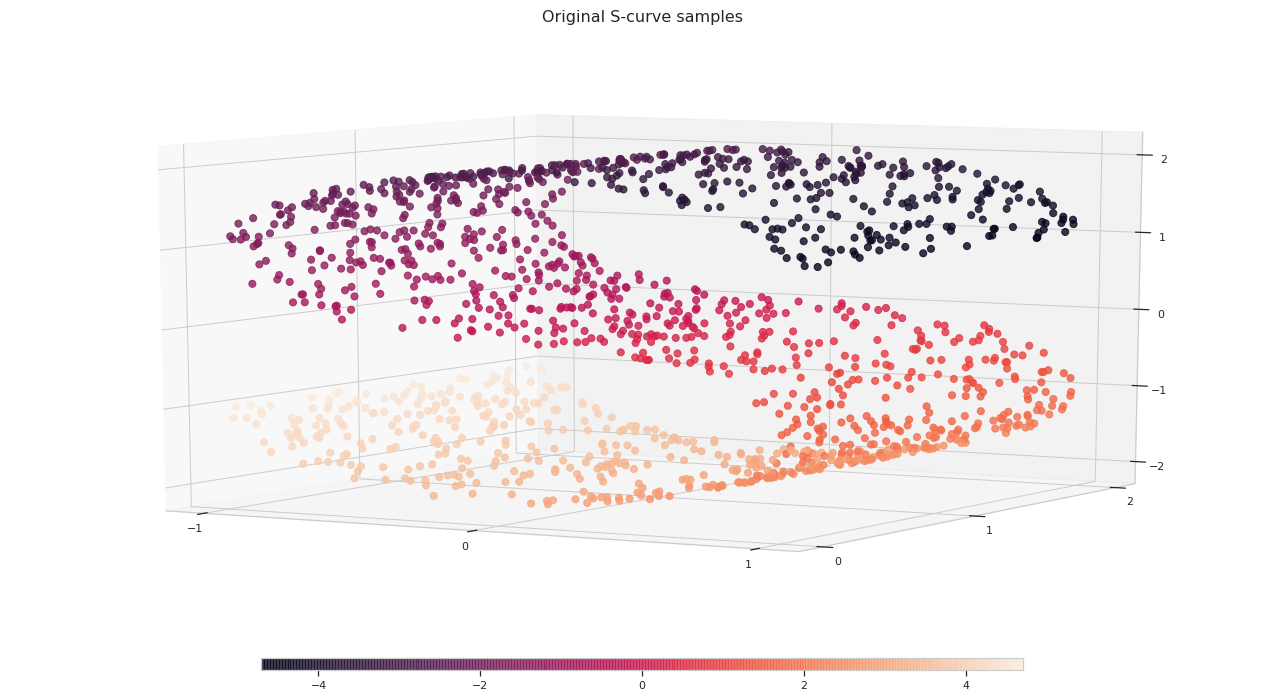

In [9]:
def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(18, 11),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()

plot_3d(S_points, S_color, "Original S-curve samples")

Now let's use Metric MDS on S curve.

In [10]:
from sklearn.manifold import MDS

I will use both metric MDS and non-Metric MDS. I will plot the reduced results returned by both of the algorithms to compare their performance on this data. However, unfortunately there is not a way for us to compare the results reconstruction error or explained_variance_ratio_ since MDS does not provide these arguments. On the other hand, MDS provides direct result of stress function with the argument `stress_`, we can use this argument for comparing results since it is sum of squared distance of the disparities and the distances for all constrained points

In [11]:
metric_MDS = MDS(n_components=2)

In [12]:
X_reduced = metric_MDS.fit_transform(S_points)

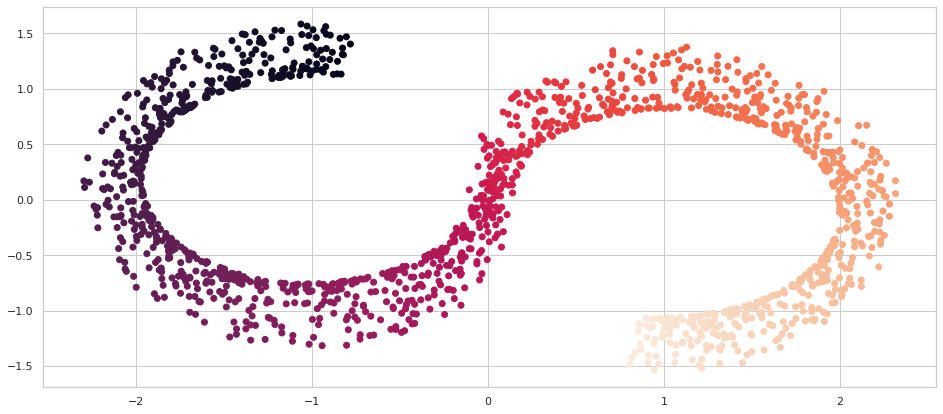

In [13]:
plt.figure(figsize=(16, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=S_color)

In [14]:
metric_MDS.stress_

86108.09754890909

In [15]:
nonMetric_MDS = MDS(n_components=2,metric=False)

In [16]:
X_reduced = nonMetric_MDS.fit_transform(S_points)

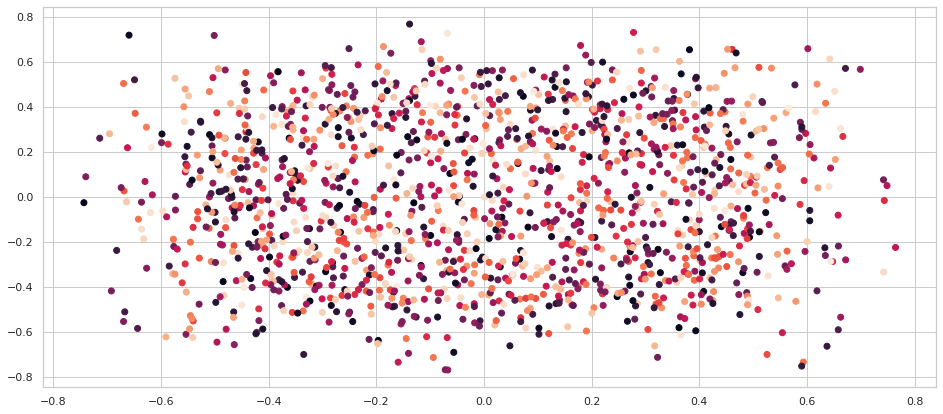

In [17]:
plt.figure(figsize=(16, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=S_color)

In [18]:
nonMetric_MDS.stress_

51436.6267731701

# t-Distributed Stochastic Neighbor Embedding 

t-Distributed Stochastic Neighbor Embedding or t-SNE for short is one of the most widely used dimensionality reduction techniques which is also widely used for visualization. t-SNE tries to find a lower-dimensional representation by modeling the data with a probability distribution and finding a lower-dimensional approximation of the data that closely matches its distribution. The algorithm tries to remain close points (neighbors) as tight as possible while trying to remain distant points as far as possible.

Let's see how it works.

**1. We start by defining a similarity function $p_{ij}$ on the input space.**

For each point $j$ in our data, the similarities $p_{i|j}$ will be interpreted as a probability distribution to capture a possible underlying cluster structure.  

$$p_{i|j}=\frac{exp\left(\frac{-\left|x_i-x_j\right|^2\:}{2\sigma ^2_j}\right)}{\sum _{k\ne i}exp\left(\frac{-\left|x_k-x_j\right|^2\:}{2\sigma^2_j}\right)}$$

The equation above is called the gaussian kernel which we use for modeling the similarity between $i$ and $j$. 

The similarities are also normalized to sum to 1, so that we can use them as a probability distribution.

$$p_{ij}=\frac{p_{i|j}+p_{j|i}}{2n}$$

**2. The variance $sigma \:^2$ in the equation above is not specified directly, instead it is calculated by a parameter that is dependent on the variance and set by the user.**

This parameter is called perplexity and it can be interpreted as the effective number of neighbors for the central point. 
Perplexity is defined as the following:

$$Perp\left(P_i\right)=2^{H\left(P_i\right)}$$

where ${H\left(P_i\right)}$ is named Shannon entropy and defined as

$$H\left(P_i\right)=-\sum _{i\ne j}\left(p_{j|i}\:log_2\left(p_{j|i}\right)\right)$$

We calculate the value of value of $\sigma \:^2$ such that it produces a $P_i$ with a fixed perplexity that is specified by the user and the entropy of distribution increases as $\sigma ^2$ increases.

**3. We calculated the similarity scores in the input space,T now we need to do the same for the output space.**

In earlier version of the algorithm (SNE), gaussian kernel was also used for calculating the similarity scores in the output space. However, it turns out that using Cauchy Kernel is more appropriate. Cauchy kernel defined as the following

$$q_{i|j}=\frac{exp\left(1+\left|\left|y_i-y_j\right|\right|\right)^{-1}}{\sum _{k\ne i}\:exp\left(1+\left|\left|y_i-y_k\right|\right|\right)^{-1}}$$

* This makes (using Cauchy Kernel) the map’s representation of joint probabilities (almost) invariant to changes in the scale of the map for map points that are far apart. It also means that large clusters of points that are far apart interact in just the same way as individual points, so the optimization operates in the same way at all but the finest scales - [Van der Maaten, L., & Hinton, G. (2008)](https://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)


**4. Now we need to define the objective function.**

The aim of the cost function in this context is to find an embedding that has matching output similarities $q_{i|j}$ to the input similarities $p_{i|j}$ as well as possible. To do that, we will use the Kullback-Leibler divergence which is defined as:

$$C=\sum _i\:KL\left(P_i||Q_i\right)=\sum_i\sum_j\:p_{j|i}\:log\left(\frac{p_{j|i}}{q_{j|i}}\right)$$

This cost function will give a large penalization to the points that are close in the input space but far in the output space and small penalization to the points that are far in the input space but close in the output space. To optimize the function, gradient descent is used and the t-SNE gradient is defined as the following:

$$\frac{\partial C}{\partial y_i}=4\sum _j\:\left(p_{ij}-q_{ij}\right)\left(y_j-y_j\right)\left(1+\left|\left|y_j-y_j\:\right|\right|\right)^{-1}$$

The gradient tells us that we have two components here: attractive forces and repulsive forces. The points that are neighbors in the input space will be attracted to each other in the output space, whereas, the points that are not neighbors will be repelled from each other.


It is also important to note that t-SNE heavily depends on the parameters that you choose and you can get very different results in the end according to the parameters you choose in the initialization. To improve the results of the t-SNE, there are some techniques that are used. Here I would like to mention a technique called early exaggeration and an important improvement in the algorithm by using Fourier transformation. You can find more about techniques to improve the results as well as the algorithm behind t-SNE in the additional sources at the end.

**Early Exaggeration:** The repulsion forces can sometimes be too strong that they do not allow some of the neighbors to come closer. This happens when the gradient descent gets stuck in local minima. To get on top of this problem, we can use a trick called early exaggeration which increases the attractive forces $p_{ij}$ in the initial stages of the optimization so that the massive attractive force will collect the clusters together without getting affected by the large repulsion.

1. [Introduction to Machine Learning - 11 - Manifold learning and t-SNE](https://www.youtube.com/watch?v=MnRskV3NY1k)
1. [StatQuest: t-SNE, Clearly Explained](https://www.youtube.com/watch?v=NEaUSP4YerM)
1. [How t-SNE works](https://www.tivadardanka.com/blog/how-tsne-works)
1. [t-SNE clearly explained](https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a)
1. [Visualizing Data using t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)
1. [Statistical Machine Learning Part 31 - t-SNE](https://www.youtube.com/watch?v=StqH9kjDsv4&t=911s)

Now let's finally use t-SNE. I will use the algorithm on S-curve.

In [19]:
from sklearn.manifold import TSNE
t_sne = TSNE(
    learning_rate="auto",
    perplexity=30,
    n_iter=250,
    init="random",
    random_state=42,
)

In [20]:
X_reduced=t_sne.fit_transform(S_points)

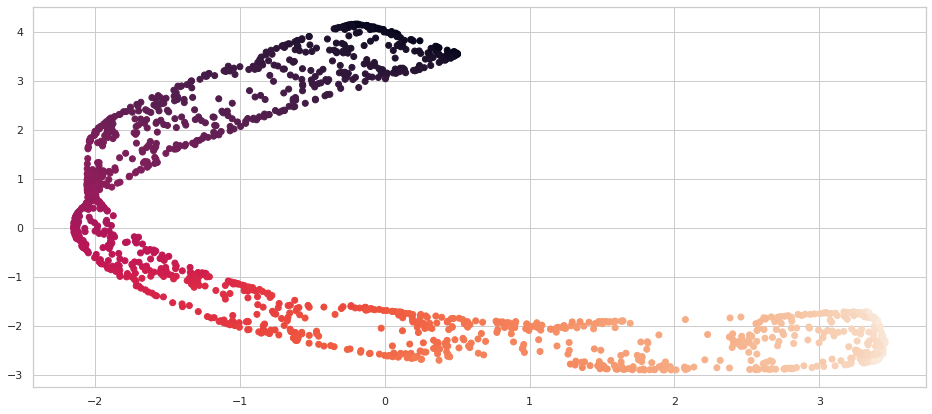

In [21]:
plt.figure(figsize=(16, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=S_color)

t-SNE does not preserve the S-shape as MDS but it still provides a good two dimensional representation. Above we used `init=random`, let's also initialize the algorithm with PCA.

In [22]:
from sklearn.manifold import TSNE
t_sne = TSNE(
    learning_rate="auto",
    perplexity=30,
    n_iter=250,
    init="pca",
    random_state=42,
)

In [23]:
X_reduced=t_sne.fit_transform(S_points)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


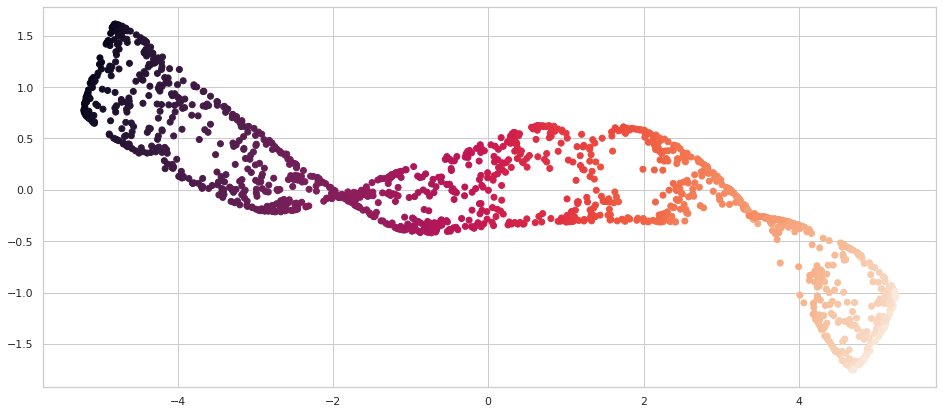

In [24]:
plt.figure(figsize=(16, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=S_color)

I personally, liked the version returned by PCA initialization a bit more. Let's do an quick example and experiment around with different values of `learning_rate`, `perplexity`, and `n_iter`.

In [25]:
lr=[100,200,300,500,800]
perp=[30,50,90,120,200]
iter=[250,500,750,1000]

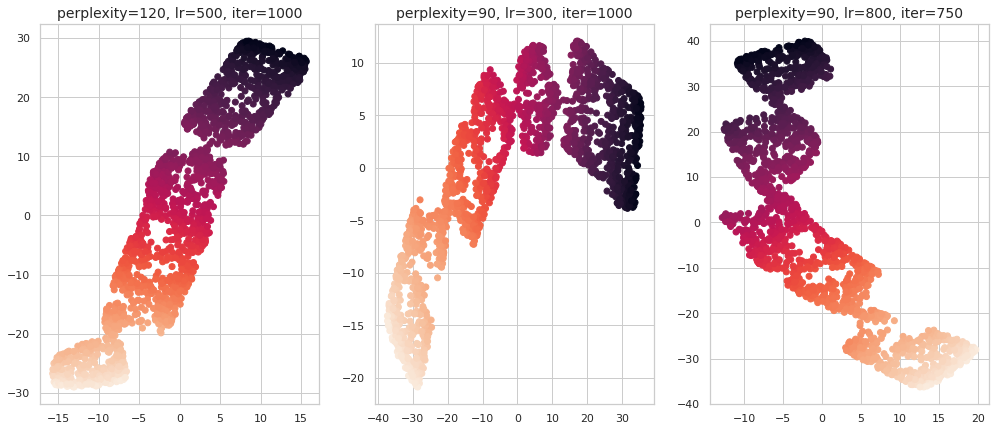

In [26]:
from random import randint
s=1
fig, axes = plt.subplots(1, 3, figsize=(17, 7))
for i in range(3):
    rand_lr=randint(0, 4)
    rand_perp=randint(0, 4)
    rand_iter=randint(0, 3)
    
    t_sne = TSNE(
    learning_rate=lr[rand_lr],
    perplexity=perp[rand_perp],
    n_iter=iter[rand_iter],
    init="random",
    random_state=42)
    
    X_reduced=t_sne.fit_transform(S_points)

    axes[i].scatter(X_reduced[:, 0], X_reduced[:, 1], c=S_color)
    axes[i].set_title("perplexity="+str(perp[rand_perp])+", lr="+str(lr[rand_lr])+", iter="+str(iter[rand_iter]),fontsize=14)
    s=s+1

    

As it can be seen, parameters are quite important for t-SNE. Using `GridSearchCV()` can be good for parameter searching for t-SNE. Also check out the documentation for t-SNE to learn more about the parameters you can tune [link](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

Let's also use t-SNE on MNIST Numbers dataset.

In [27]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1, as_frame=False)# let's load MNIST Numbers 
mnist.target = mnist.target.astype(np.uint8)
X = mnist["data"]
y = mnist["target"]

In [28]:
tsne = TSNE(n_components=2, random_state=42)
X_mnist_reduced = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


I will create two plots for showing the low-dimensional representation of MNIST: the first plot will be a regular seaborn scatter plot, the second one, on the other hand, is an altered code from Géron, A. (2019) in which I will also show labels on points.

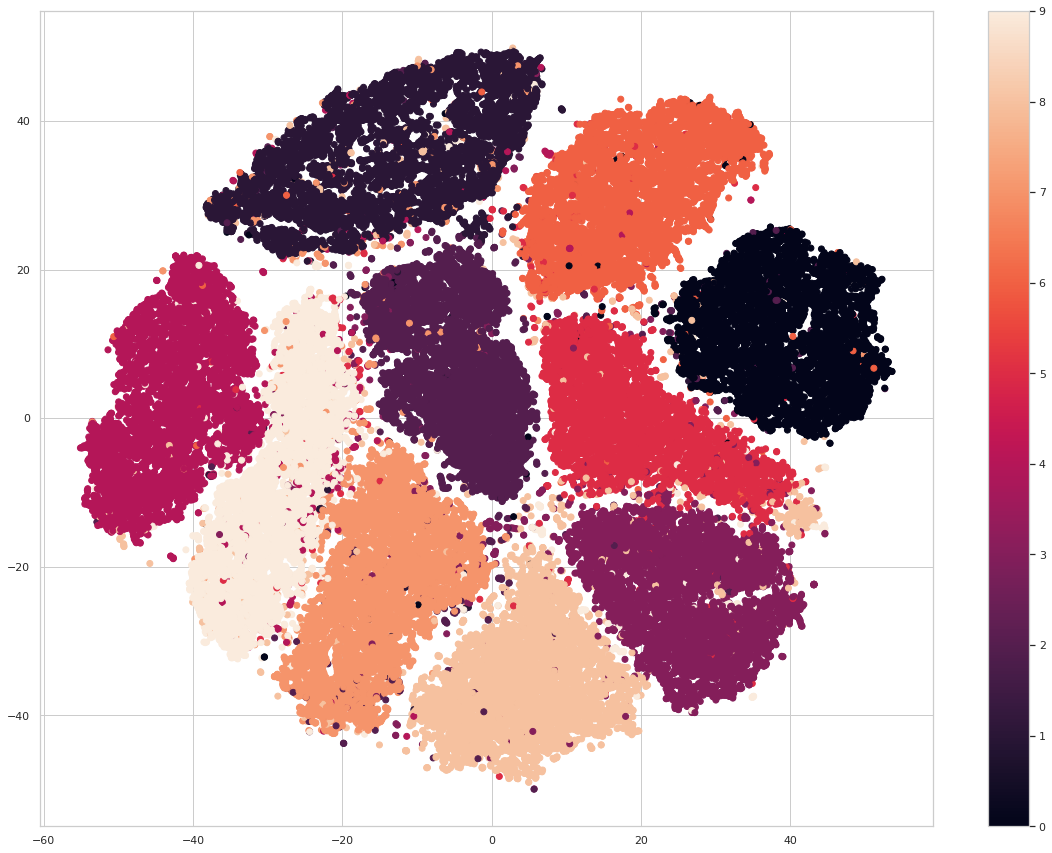

In [29]:
plt.figure(figsize=(20, 15))
plt.scatter(X_mnist_reduced[:, 0], X_mnist_reduced[:, 1],c=y)
plt.colorbar()

In [30]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib as mpl
def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)): # altered version from 
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    cmap = sns.color_palette("rocket", as_cmap=True)
    digits = np.unique(y)
    for digit in digits:
        sns.scatterplot(x=X_normalized[y == digit, 0],y=X_normalized[y == digit, 1],c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca() 
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

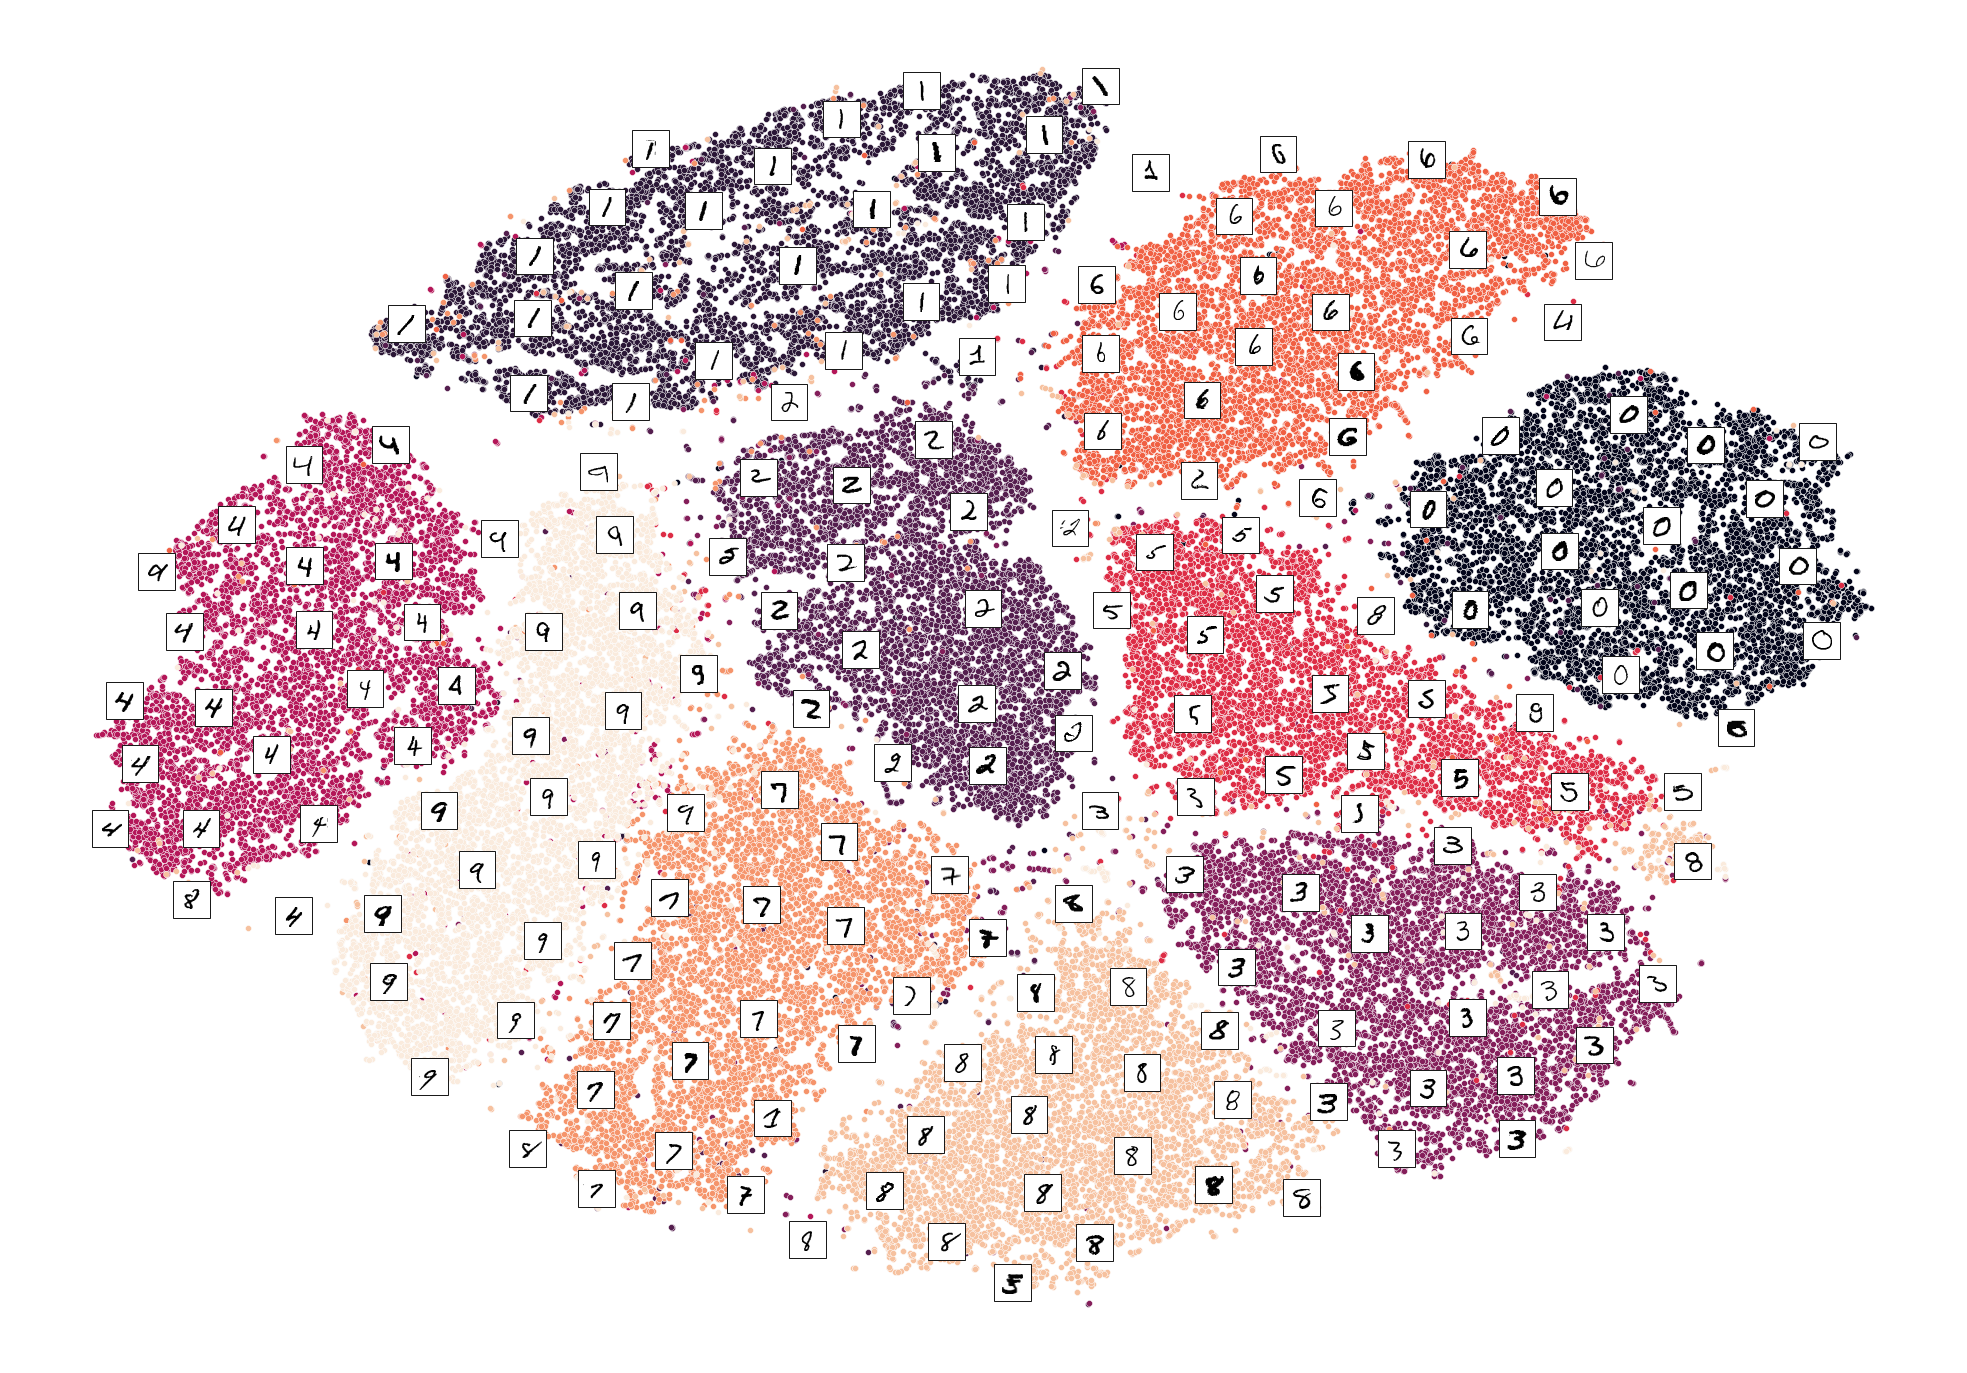

In [31]:
plot_digits(X_mnist_reduced, y, images=X, figsize=(35, 25))

## FFT-accelerated Interpolation-based t-SNE (FIt-SNE)

I will be brief about this algorithm and share the paper if you'd like to read more about how it works.

The t-SNE algorithm that I introduced above uses the Barnes-Hut algorithm to approximate repulsive force at each iteration of gradient descent. The Barnes-Hut algorithm is a tree-based algorithm that has the running time of $O\left(NlogN\right)$, where N is the total number of data points. FFT-accelerated Interpolation-based t-SNE uses polynomial interpolants and Fast Fourier Transform (FFT) and computes the repulsive force at a time complexity of $O\left(N\right)$ which is a much better running time complexity compared to $O\left(NlogN\right)$.

Check out the paper for mathematical details [link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6402590/)

You can also find the Python implementation of Flt-SNE on the following Github repository [link](https://github.com/KlugerLab/FIt-SNE)

Let's also quickly use Flt-SNE, I will compare them in the fourth notebook in a bit more detail.

In [32]:
!git clone https://github.com/KlugerLab/FIt-SNE.git
!wget http://www.fftw.org/fftw-3.3.8.tar.gz
!tar -xf fftw-3.3.8.tar.gz
!cd fftw-3.3.8
!./fftw-3.3.8/configure
!make
!make install
!g++ -std=c++11 -O3  FIt-SNE/src/sptree.cpp FIt-SNE/src/tsne.cpp FIt-SNE/src/nbodyfft.cpp  -o FIt-SNE/bin/fast_tsne -pthread -lfftw3 -lm -Wno-address-of-packed-member
import sys; sys.path.append('FIt-SNE/')

Cloning into 'FIt-SNE'...
remote: Enumerating objects: 922, done.
remote: Total 922 (delta 0), reused 0 (delta 0), pack-reused 922
Receiving objects: 100% (922/922), 32.06 MiB | 19.81 MiB/s, done.
Resolving deltas: 100% (528/528), done.
--2022-09-11 22:19:40--  http://www.fftw.org/fftw-3.3.8.tar.gz
Resolving www.fftw.org (www.fftw.org)... 216.137.187.110
Connecting to www.fftw.org (www.fftw.org)|216.137.187.110|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4110137 (3.9M) [application/octet-stream]
Saving to: ‘fftw-3.3.8.tar.gz’

fftw-3.3.8.tar.gz   100%[===================>]   3.92M  2.39MB/s    in 1.6s    

2022-09-11 22:19:43 (2.39 MB/s) - ‘fftw-3.3.8.tar.gz’ saved [4110137/4110137]

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking whether make 

In [33]:
from fast_tsne import fast_tsne

FFT t-SNE has very similar parameters to classical t-SNE. Let's use some of the parameters that we are already familiar.

In [34]:
%time fft_tsne = fast_tsne(X, perplexity=3,learning_rate=300,seed=42)

CPU times: user 7.95 s, sys: 3.1 s, total: 11 s
Wall time: 2min 41s


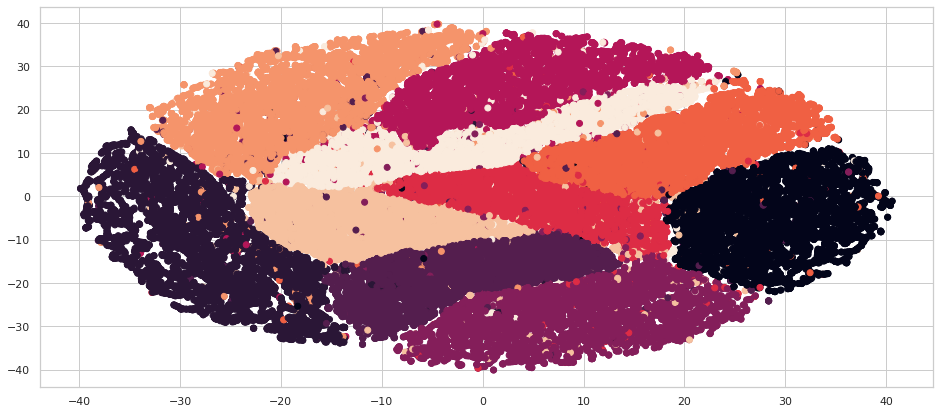

In [35]:
plt.figure(figsize=(16, 7))
plt.scatter(fft_tsne[:, 0], fft_tsne[:, 1], c=y)

Let's also increase early_exaggeration rate to increase the seperation.

In [36]:
%time fft_tsne = fast_tsne(X, perplexity=20, learning_rate=250, seed=42, late_exag_coeff=4)

CPU times: user 8.41 s, sys: 1.23 s, total: 9.64 s
Wall time: 4min 21s


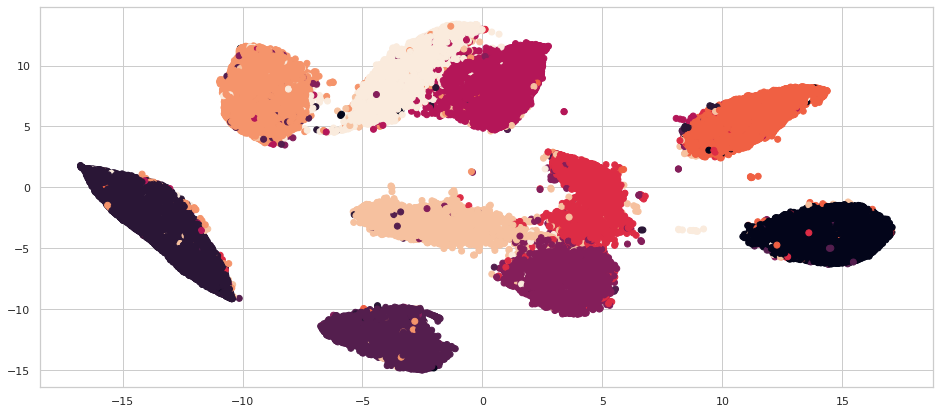

In [37]:
plt.figure(figsize=(16, 7))
plt.scatter(fft_tsne[:, 0], fft_tsne[:, 1], c=y)

We can also use Gaussian kernel with FFT t-SNE, let's do it and compare the results with cauchy kernel.

In [38]:
%time fft_tsne_gaussian = fast_tsne(X, perplexity=20, learning_rate=250, seed=42, late_exag_coeff=4,df=100)

CPU times: user 8.52 s, sys: 2.15 s, total: 10.7 s
Wall time: 4min 38s


In [39]:
%time fft_tsne_cauchy= fast_tsne(X, perplexity=20, learning_rate=250, seed=42, late_exag_coeff=4,df=1)

CPU times: user 8.5 s, sys: 1.17 s, total: 9.67 s
Wall time: 4min 25s


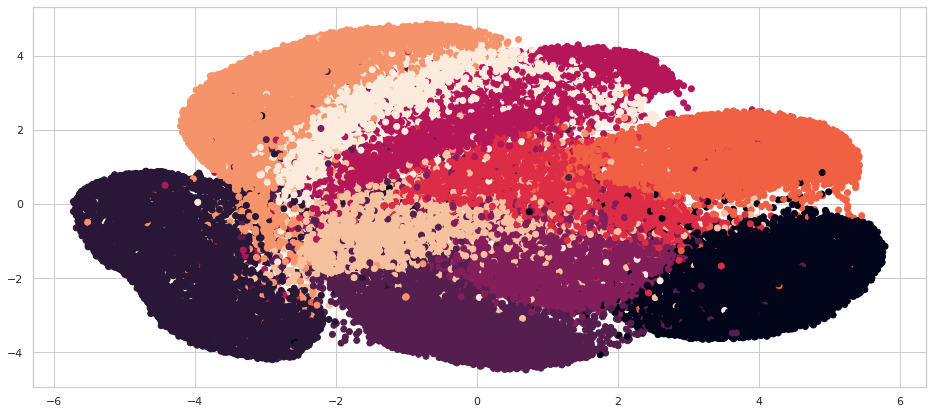

In [40]:
plt.figure(figsize=(16, 7))
plt.scatter(fft_tsne_gaussian[:, 0], fft_tsne_gaussian[:, 1], c=y)

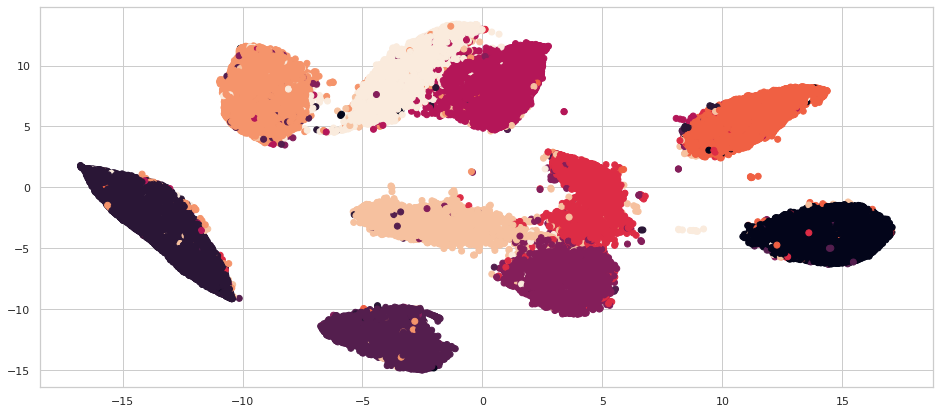

In [41]:
plt.figure(figsize=(16, 7))
plt.scatter(fft_tsne_cauchy[:, 0], fft_tsne_cauchy[:, 1], c=y)

I will compare FFT-tSNE with t-SNE and UMAP in the fourth notebook.

# Isometric Mapping (ISOMAP)

Remember what I said about geodesic distance, that we can use it for manifolds. ISOMAP is Metric MDS with geodesic distance. So it will be fairly easy to understand this algorithm if you are familiar with MDS.

Let's start with understanding the reason that we use geodesic distance for mapping manifolds. Assume we have the swiss role below, if we calculate the euclidean distance (the dashed blue line) this would not represent the intrinsic similarity well, on the other hand, the geodesic distance which is defined as the shortest distance along the manifold can do a better job representing the similarity on the manifold.

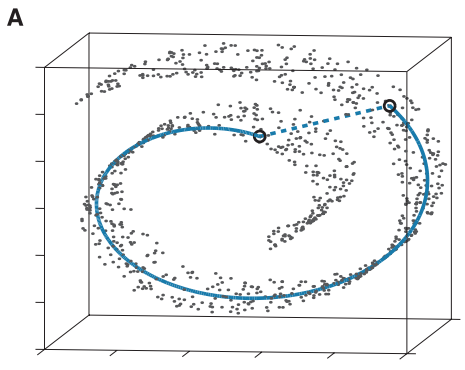

However, the problem is that we cannot exact geodesic distances unless we know the true manifold. In practice, on the other hand, we can approximate the geodesic distance $d_M\left(i,j\right)$ by using a short-path distances $d_{sp}\left(i,j\right)$ on a nearest-neighbor graph G as illustrated in the figure B. In other words,  to calculate geodesic distance we need to use a nearest-neighbor graph.

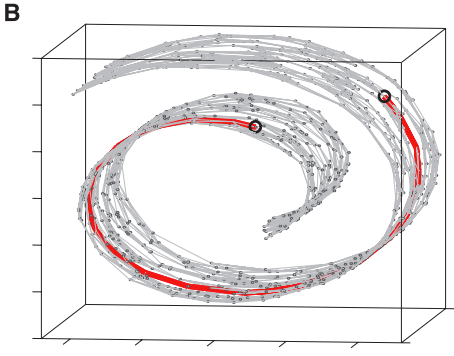

Then we will have a distance matrix D, and we can apply Metric MDS on this distance matrix and get an embedding that preserves the shortest path distances.

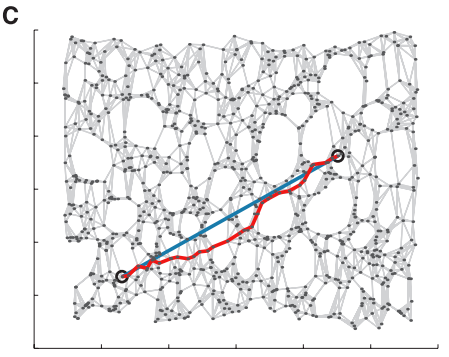

## Mathematical Details behind ISOMAP

Let's go through step-by-step

Assume we are given abstract data points $X_1,......,X_n\:$ and a distance function $d\left(x_i,x_j\right)$

1. We start by building a neighborhood graph G from the given data points. To do that, The algorithm connects the nearby points with edges weighted by the distance function. For instance, let's assume that we are using euclidean distance $d_X\left(i,j\right)=\left|\left|x_i-x_j\right|\right|$ for connecting the data points.

To find neighbor points, we need to define “closeness”, we can do that in two ways:

**kNN approach:** For each point $x_i$, $x_j$ is close if it is among the k nearest neighbors of $x_i$

**Epsilon Ball Approach:** For each point $x_i$, we define a threshold, namely epsilon and say that $x_j$ is close if $\:d_X\left(i,j\right)\le \epsilon $

2. Now we need to compute the shortest path. To do that, we can use two efficient algorithms: one of them is named Dijkstra's algorithm and the other one is the Floyd–Warshall algorithm. I preferred not to mention them here in detail, however, you can find more about them in the additional sources part. By using one of these algorithms, we calculate $d_{sp}$ for all the pairs of points, therein, we also calculate the geodesic distance to construct the distance matrix D.

3. Now we can apply Metric MDS on the distance matrix and find the embedding that approximately preserves the geodesic distance.


1. [Statistical Machine Learning Part 30 - Isomap](https://www.youtube.com/watch?v=PNcxAbZX5X0)
1. [Statistical Machine Learning Part 29 - Neighborhood graphs](https://www.youtube.com/watch?v=8dxc3_00m3M&t=894s)
1. [Isometric Feature Mapping (ISOmap)](https://www.sjsu.edu/faculty/guangliang.chen/Math253S20/lec10ISOmap.pdf)
1. [Dijkstra's algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm#Algorithm)
1. [A Global Geometric Framework for Nonlinear Dimensionality Reduction](https://wearables.cc.gatech.edu/paper_of_week/isomap.pdf)
1. [A Scalable Approach to Modeling Nonlinear Structure in Hyperspectral Imagery and Other High-Dimensional Data Using Manifold Coordinate Representations](https://www.researchgate.net/profile/Robert-Fusina/publication/238540566_A_Scalable_Approach_to_Modeling_Nonlinear_Structure_in_Hyperspectral_Imagery_and_Other_High-Dimensional_Data_Using_Manifold_Coordinate_Representations/links/55563f5008aeaaff3bf5f01a/A-Scalable-Approach-to-Modeling-Nonlinear-Structure-in-Hyperspectral-Imagery-and-Other-High-Dimensional-Data-Using-Manifold-Coordinate-Representations.pdf?origin=figuresDialog_download)

Let's use the algorithm on S-Curve.

In [42]:
from sklearn.manifold import Isomap
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import VALID_METRICS

In [43]:
isomap = Isomap(path_method="D",neighbors_algorithm="brute",metric="manhattan",n_neighbors=15)
X_reduced = isomap.fit_transform(S_points)

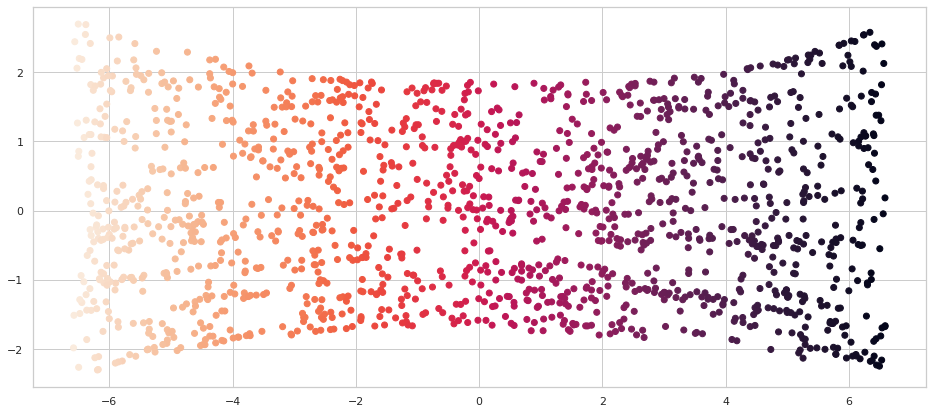

In [44]:
plt.figure(figsize=(16, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=S_color)

ISOMAP provides some important arguments such as `neighbors_algorithm`, `eigen_solver`, `n_neighbors`, and `metric`. You can use different distance metrics with the `metric` argument, different solvers with `eigen_solver`, change the number of nearest neighbors with `n_neighbors` etc. These arguments can considerably change the result returned by the algorithm. You can use  `sklearn.neighbors.VALID_METRICS` for searching the parameters that you can use with prefered neighbors_algorithm.

In [45]:
VALID_METRICS['brute']# valid parameters for neighbors_algorithm=brute

['cityblock',
 'cosine',
 'euclidean',
 'haversine',
 'l2',
 'l1',
 'manhattan',
 'precomputed',
 'nan_euclidean',
 'braycurtis',
 'canberra',
 'chebyshev',
 'correlation',
 'cosine',
 'dice',
 'hamming',
 'jaccard',
 'kulsinski',
 'mahalanobis',
 'matching',
 'minkowski',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'yule',
 'wminkowski']

Check out the documentation for more [link](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html)